In [130]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2

image_size = (120, 160)
batch_size =64


train_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/train"
test_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/test"
valid_dir = "/Users/zuzannaszubartowska/code/crop_colour/data/validation"


num_classes = 14

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['blackbishop', 'blackking', 'blackknight', 'blackpawn', 'blackqueen', 'blackrook', 'whitebishop', 'whiteking', 'whiteknight', 'whitepawn', 'whitequeen', 'whiterook','blackempty','whiteempty'])


validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical',classes=['blackbishop', 'blackking', 'blackknight', 'blackpawn', 'blackqueen', 'blackrook', 'whitebishop', 'whiteking', 'whiteknight', 'whitepawn', 'whitequeen', 'whiterook','blackempty','whiteempty'])


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(120, 160),
    batch_size=batch_size,
    class_mode='categorical',
    classes=['blackbishop', 'blackking', 'blackknight', 'blackpawn', 'blackqueen', 'blackrook', 'whitebishop', 'whiteking', 'whiteknight', 'whitepawn', 'whitequeen', 'whiterook','blackempty','whiteempty'])


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001),input_shape=(120, 160,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (2, 2), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

Found 2212 images belonging to 14 classes.
Found 660 images belonging to 14 classes.
Found 1959 images belonging to 14 classes.


In [131]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [132]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 118, 158, 64)      1792      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 59, 79, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 57, 77, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 28, 38, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 27, 37, 256)       131328    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 18, 256)     

In [133]:
from keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
    monitor='val_accuracy', 
    min_delta=0.001, 
    patience=10, 
    verbose=1, 
    mode='auto',
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[earlystop_callback]
)


Epoch 1/100
34/34 [==============================] - 55s 2s/step - loss: 2.6232 - accuracy: 0.4078 - val_loss: 1.5633 - val_accuracy: 0.6328
Epoch 2/100
34/34 [==============================] - 58s 2s/step - loss: 1.5779 - accuracy: 0.5824 - val_loss: 1.0993 - val_accuracy: 0.7391
Epoch 3/100
34/34 [==============================] - 62s 2s/step - loss: 1.2209 - accuracy: 0.6466 - val_loss: 0.9402 - val_accuracy: 0.7375
Epoch 4/100
34/34 [==============================] - 62s 2s/step - loss: 1.0023 - accuracy: 0.7100 - val_loss: 1.0218 - val_accuracy: 0.7937
Epoch 5/100
34/34 [==============================] - 63s 2s/step - loss: 0.8386 - accuracy: 0.7742 - val_loss: 0.9424 - val_accuracy: 0.7969
Epoch 6/100
34/34 [==============================] - 69s 2s/step - loss: 0.7007 - accuracy: 0.8133 - val_loss: 1.0072 - val_accuracy: 0.8203
Epoch 7/100
34/34 [==============================] - 72s 2s/step - loss: 0.6190 - accuracy: 0.8347 - val_loss: 0.9299 - val_accuracy: 0.8313
Epoch 8/100
3

In [134]:
test_loss, test_acc = model.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

31/31 [==============================] - 15s 493ms/step - loss: 0.9954 - accuracy: 0.8857
Test loss: 0.9954351186752319
Test accuracy: 0.88565593957901


In [135]:
model.save('/Users/zuzannaszubartowska/code/zuzannaszu/chess_hackers')

INFO:tensorflow:Assets written to: /Users/zuzannaszubartowska/code/zuzannaszu/chess_hackers/assets


INFO:tensorflow:Assets written to: /Users/zuzannaszubartowska/code/zuzannaszu/chess_hackers/assets


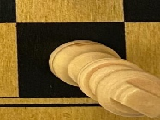

In [136]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = '/Users/zuzannaszubartowska/code/crop_colour/puzzle/whiteking/puzzle2-crop62.jpeg'
img = load_img(img_path, target_size=(120, 160))

img_array = img_to_array(img)

img

In [137]:
import numpy as np

img_array /= 255.0

img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

predicted_class_index = np.argmax(predictions)

class_labels = list(train_generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]


print("Predicted class label: ", predicted_class_label)

1/1 [==============================] - 0s 98ms/step
Predicted class label:  whitepawn
